[View in Colaboratory](https://colab.research.google.com/github/guitar79/OA-2018/blob/master/07_3_Drawing_H_R_Diagram_using_HST_data.ipynb)

**Drawing H-R Diagram using HST data**


* 이 자료는Hubble Space Telescope (HST)의 WFPC2 F450W 과 F814W filters data를 이용하여 HR Diagram을 그리는 교수학습자료이다.

* 이 자료는 아래 자료를 참고하여, python3 환경에서 돌아가도록 수정하여 작성하였다. http://www.jasonkendall.com/WPU/HRDiagram/
http://nbviewer.jupyter.org/github/ysbach/AO_2017/blob/master/03_Get_the_Taste.ipynb

* python이 처음이라면 [Python Basic](https://colab.research.google.com/drive/1PCOoDIKypPVX9KTItMOht1cl96cPmeR_?authuser=1#scrollTo=3g6o04iLM0AF), [Python packages](https://colab.research.google.com/drive/1-1wx2VPEyNe11bmgpSpwdQgrJASCAqdH?authuser=1)를 먼저 학습하기를 권한다.

* package를 쉽게 설치하기 위해 Anaconda 사용을 권장한다.

* 경기과학고등학교 관측천문학 강좌를 위해 만들었으며 라이센스는 다음을 따른다.
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="크리에이티브 커먼즈 라이선스" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />이 저작물은 <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">크리에이티브 커먼즈 저작자표시-비영리-동일조건변경허락 4.0 국제 라이선스</a>에 따라 이용할 수 있음.

#Download data

Hubble Legacy Archive (http://hla.stsci.edu/) 사이트에 접속한 후 "Enter Site here" 를 클릭한다. 


* "M80"을 검색하면 많은 데이타가 보일 것이다.
* "Detector" column : "WFPC2" 를 입력하고 "Enter"
* "NExposures" column : 6
* "PropID" column : "11233"
* "VisitNum" = 06 

이제 2개의 자료만 보일 것이다. 

테이블 마지막 부분에 DAOPHOT algorithm에 의한 "DAOCat" data와 ,  SExtractor algorithm에 의한 "SEXCat" 자료가 있다. 

"DAOphot" link를 클릭하여 두 자료를 다운로드 받자.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
# NumPy automatically skips the commented rows.
F450 = np.loadtxt('hst_11233_06_wfpc2_f450w_wf_daophot_trm.cat') 
F814 = np.loadtxt('hst_11233_06_wfpc2_f814w_wf_daophot_trm.cat')

print (F450)

print ('******'*5)

print (F814)

[[1839.865      680.779      244.264694  ... -999.        -999.
     0.       ]
 [1837.589      676.567      244.2647626 ... -999.        -999.
     0.       ]
 [1836.598      686.129      244.2647926 ... -999.        -999.
     0.       ]
 ...
 [ 232.368      757.548      244.3131989 ... -999.        -999.
     0.       ]
 [ 230.792      770.891      244.3132464 ... -999.        -999.
     0.       ]
 [ 213.691      705.85       244.3137627 ... -999.        -999.
     0.       ]]
******************************
[[1839.865      680.779      244.264694  ... -999.        -999.
     0.       ]
 [1837.589      676.567      244.2647626 ... -999.        -999.
     0.       ]
 [1836.598      686.129      244.2647926 ... -999.        -999.
     0.       ]
 ...
 [ 230.792      770.891      244.3132464 ... -999.        -999.
     0.       ]
 [ 213.691      705.85       244.3137627 ... -999.        -999.
     0.       ]
 [ 209.054      696.384      244.3139027 ... -999.        -999.
     0.       

# Processing data

HR diagram 을 그리기 위해 필요한 자료는 다음과 같다.


*  $\rm{Color~Index} = M_{F450} - M_{F814}$
*  $\rm{Magnitude} = M_{F450}$

다운받은 자료에서 별의 ID (5th colomn), 별의 Magnitude (6th column)를 이용하면 된다.



In [2]:
print (F450)
print (F450[:,4])

[[1839.865      680.779      244.264694  ... -999.        -999.
     0.       ]
 [1837.589      676.567      244.2647626 ... -999.        -999.
     0.       ]
 [1836.598      686.129      244.2647926 ... -999.        -999.
     0.       ]
 ...
 [ 232.368      757.548      244.3131989 ... -999.        -999.
     0.       ]
 [ 230.792      770.891      244.3132464 ... -999.        -999.
     0.       ]
 [ 213.691      705.85       244.3137627 ... -999.        -999.
     0.       ]]
[3158. 3115. 3208. ... 4002. 4119. 3427.]


여기서 해결해야 할 문제는 두 파일 (F450, F814)에서 데이터 갯수가 서로 다르다는 것이다. 

이를 해결하려면 별의 ID를 비교하는 과정이 필요할텐데 다음과 같은 bool data type을 이용하면 해결할 수 있을 것이다.

In [3]:
import numpy as np

num1 = np.arange(0, 11, 2) # generate numpy array (0, 11) with interval 2

print("\nnum1's elements:")
print(num1)

# MASKING
tf   = np.array([False, True, False, True, True, False])

print (tf)

print("\nnum1's selected elements:")
print(num1[tf])



num1's elements:
[ 0  2  4  6  8 10]
[False  True False  True  True False]

num1's selected elements:
[2 6 8]


먼저 F450과 F814 의 데이터 갯수를 하나나하 loop 문으로 비교해야 할 것이다.

In [4]:
print (len(F450))
print (len(F814))

5739
7193


F450에 있는 별의 ID와 일치하는 별이 F814에 있는지 찾아서 색지수를 구하고 일치하는 자료의 bool 자료를 true로 저장하자.

In [5]:
# get CI value and masking 
mask  = np.zeros(len(F450)).astype(bool)
color = np.zeros(len(F450))

# Get color indices of the "same" stars in two filter images
for i in range(0, len(F450)):
    ID450 = F450[i,4]
    for j in range(0, len(F814)):
        ID814 = F814[j,4]
        if ID450 == ID814:
            mask[i]  = True
            color[i] = F450[i,5] - F814[j,5]
            break # Once the matched item is found from F814, go to next star of F450.
print (len(F450[mask]))
print (len(color[mask]))

5598
5598


# Chart plot

matplotlib를 이용하면 아래와 같은 코드로 HR diagram 을 그릴 수 있을 것이다.

CI
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9]
Mag
 [18.53537411 17.64648801  7.5059956  19.1216748  18.22452302 18.53986052
 18.34793431  4.06849871  1.86886962 15.48969109  7.29684361  1.26277585
 11.98488199 18.17742765  7.36998494  9.41531652  0.51480459 19.02964268
 17.45627622  4.03294279 16.04798396  7.75964421  5.6320685   3.63308601
  4.9234469   8.04255835  4.17005265 18.44795445 16.89950478  7.55673753
 11.48969229  7.98509828 19.28924847  8.79336289 18.90626023 19.05671113
  9.02771621 16.74547999 13.40430782 19.02462623 15.14321995  9.40419811
 11.28062614 15.9876918   6.79906667  0.56760428  5.07378494 16.41977085
  8.47521076 14.2214855  14.01975711  6.03111027 12.12880473  2.10612484
 10.50316744  6.36733327  4.67033121 16.72487385 19.54291517 15.15075767]


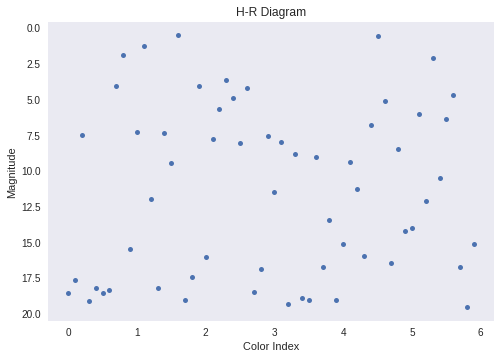

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,6,0.1)
y = np.random.rand(60)
CI = x 
Mag = y*20
print("CI\n", CI)
print("Mag\n", Mag)

#plot CI - Mag
plt.plot(CI, Mag, 'o', ms=5, alpha=1)
plt.grid()
plt.title('H-R Diagram')
plt.xlabel('Color Index')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()

#show the Diagram
plt.show()

$\rm{Color~Index}$와 $\rm{Magnitude}$ 값을 indexing 하는 코드는 각각 color[mask], F450[mask,5]이다. 

In [7]:
print(color[mask])
print(F450[mask,5])

[0.801 0.824 0.87  ... 1.268 1.079 1.619]
[22.2   23.015 22.51  ... 24.385 23.664 26.227]


HR diagram을 그려보자.

Current size: [8.0, 5.5]


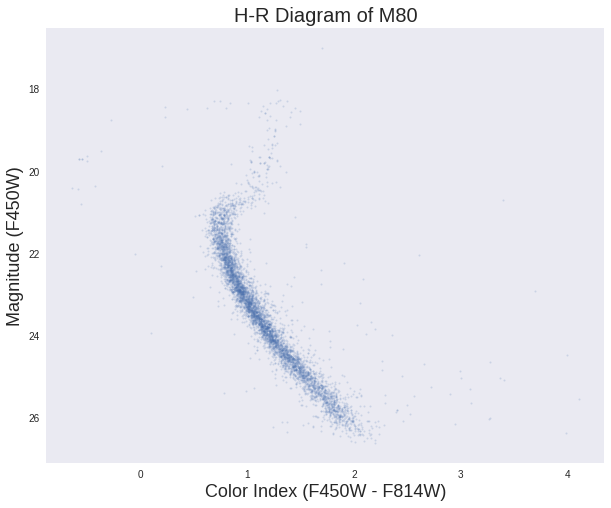

In [8]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)

# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size


plt.plot(color[mask], F450[mask,5], 'o', ms=2, alpha=0.2)
plt.title('H-R Diagram of M80', fontsize=20)
plt.xlabel('Color Index (F450W - F814W)', fontsize=18)
plt.ylabel('Magnitude (F450W)', fontsize=18)
plt.gca().invert_yaxis()

plt.grid()


#show the Diagram
plt.show()

plt.savefig('H-R Diagram of M80.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

정리 차원에서 최종 코드와 HST 자료를 첨부한다.

* [full code](https://github.com/guitar79/OA-2018/blob/master/07-3.Draw_HR_Diagram_using_HST_data.py)
* [F450](https://github.com/guitar79/OA-2018/blob/master/hst_11233_06_wfpc2_f450w_wf_daophot_trm.cat) 자료
* [F814](https://github.com/guitar79/OA-2018/blob/master/hst_11233_06_wfpc2_f814w_wf_daophot_trm.cat) 자료